# **Netflix data analysis project**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Netflix_Dataset.csv", lineterminator= '\n')  #Use: lineterminator= '\n' When work with Big Dataset Use it to arrenge in New line.
df


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [55]:
df.shape

(9827, 9)

In [56]:
# Dataset Information

df.info()
df.describe()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [57]:
# For ckecking missing value

df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [58]:
# For checking duplicate data

df.duplicated().sum()

np.int64(0)

In [59]:
# For checking Unique data.

df.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                2337
Poster_Url           9827
dtype: int64

* Exploration Summary


* We have a dataFrame consisting of 9827 rows and 9 columns.

* Our dataset looks a bit tidy with no NaN nor Duplicated values.

* Release_Date column needs to be casted(changed) into date time and to extract only the year value.

* Overview, Original_Languege and Poster_Url columns wouldn't be so useful during analysis, so we will drop them.

* Vote_Average bettter be categorised for proper analysis.

* Genre column has comma saperated values and white spaces that needs to be handled and casted into category . Exploration Summary

1> First step we cleaning the data 

In [60]:
# For changing right data type

df['Release_Date'] = pd.to_datetime(df['Release_Date'])    # errors= 'coerce' Agar koi invalid date ho to usse Nat(Not a Time)bna deta h.jisse program crash n ho

print(df['Release_Date'].dtypes)

datetime64[ns]


In [61]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [62]:
# Removing Overview, Original_Language, & Poster_Url columns because inke bare me nahi pucha h to ese insab columns ko hta dena h jisse nahi to satic aur sahi result nahi milega. 

df.drop(columns=["Overview", "Original_Language", "Poster_Url"], axis=1, inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


>* Note - Categorised Vote_Average column

 we would cut the Vote_Average values and make 4 categories:  'popular',  'average',  'below_avg',  'not_popular',  to describe it more using categorize_col  function provided above.



In [63]:
#Note - Numeric values ko Categorical data(mtlb 'String' or charcter) ke form me karne ke liye follow thif function --

def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')          # .cut() function helps in Categorization to convert in character or string format
    return df


In [64]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)    # function call

df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [65]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [66]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [67]:
df['Vote_Average'].isnull().sum()

np.int64(100)

In [68]:
df.shape

(9827, 6)

In [69]:
# For Drop NaN(null) value.

df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


>* Note - We'd split Genre into a list and then explode our dataframe to have only one Genre per row for each movie

In [72]:
# Genre column has comma saperated values and white spaces that needs to be handled and changed into category.

df['Genre'] = df['Genre'].str.split(", ")

df = df.explode('Genre').reset_index(drop = True)

df.head(7)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
5,2022,The Batman,3827.658,1151,popular,Thriller
6,2022,No Exit,2618.087,122,below_avg,Thriller


In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.shape

(25552, 6)

In [75]:
# For changing Genre datatype

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [77]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [78]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [79]:
sns.set(style='whitegrid')

Q1. What is the most frequent genre of movies released on Netflix?

In [80]:
# For checking most frequent genre of movies released on Netflix.

df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

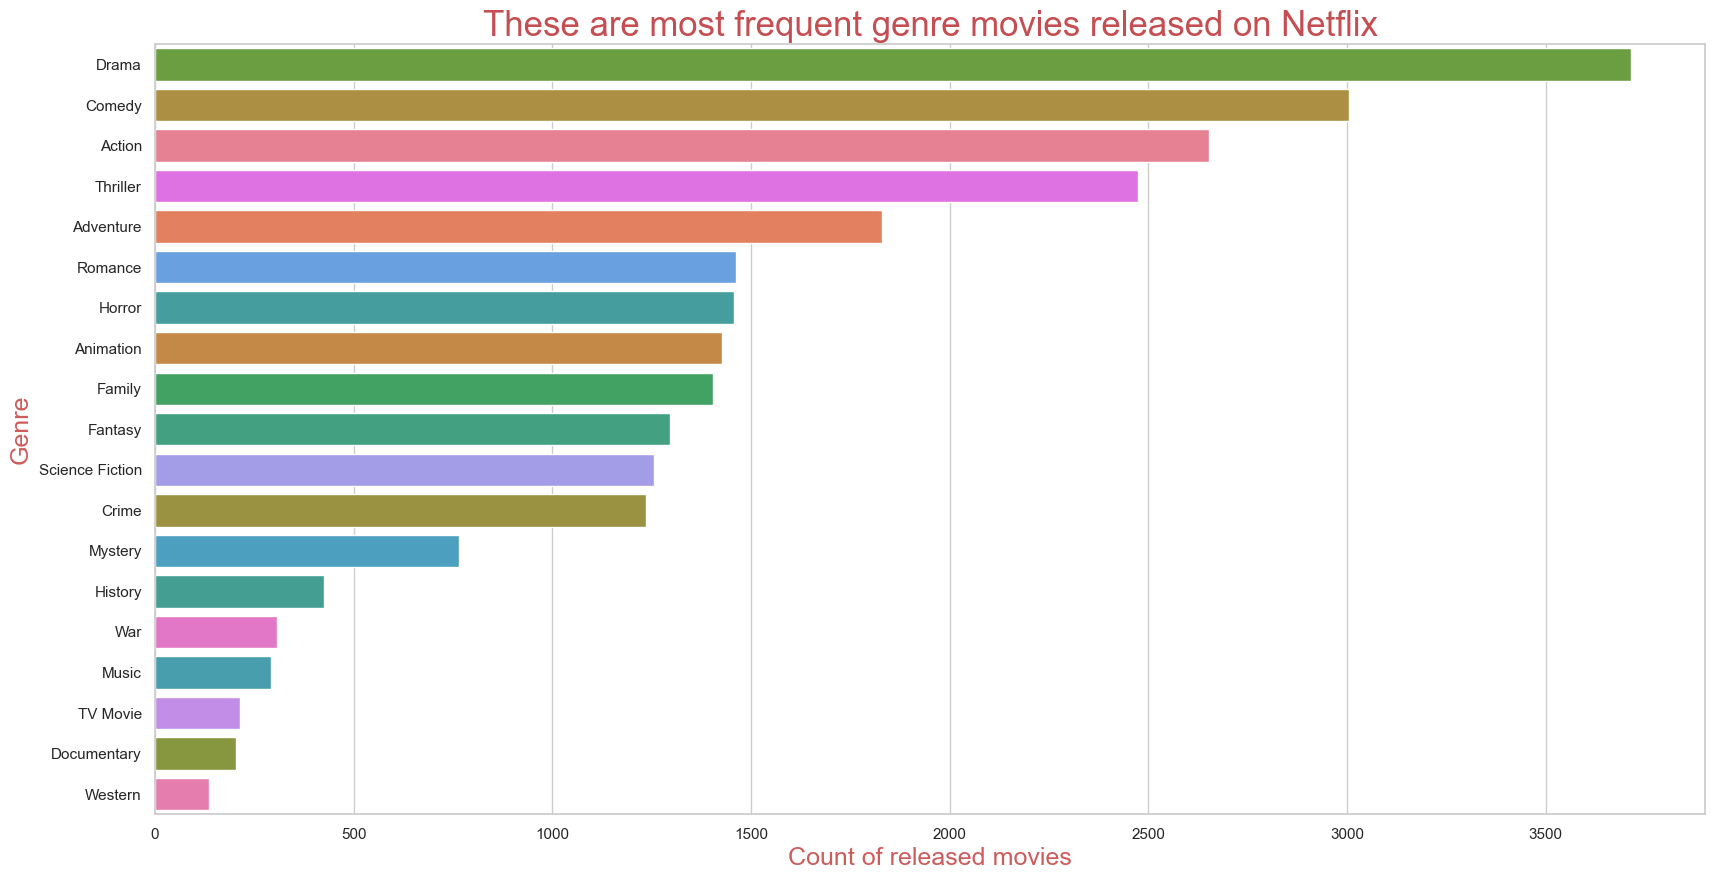

In [81]:
plt.figure(figsize=(20,10)) # For figure size

sns.countplot(y='Genre', data=df, hue="Genre", order=df['Genre'].value_counts().index)  ##Imp- | order=df['Genre'].value_counts().index |=>Use for aage jo bda h vo aaye aayega fir chota fir usse chota ese--

plt.xlabel("Count of released movies", color = "indianred", size= 18)
plt.ylabel("Genre", color = "indianred", size= 18)
plt.title("These are most frequent genre movies released on Netflix", c='r', size=25)
plt.show()

# CONCLUSION - **Drama** movie are most frequent genre movie released on Netflix

In [82]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Q2. Which has heigst votes in vote avg column?

In [83]:
Vote_avg = df['Vote_Average']

res = np.max(Vote_avg)
print(res)

popular


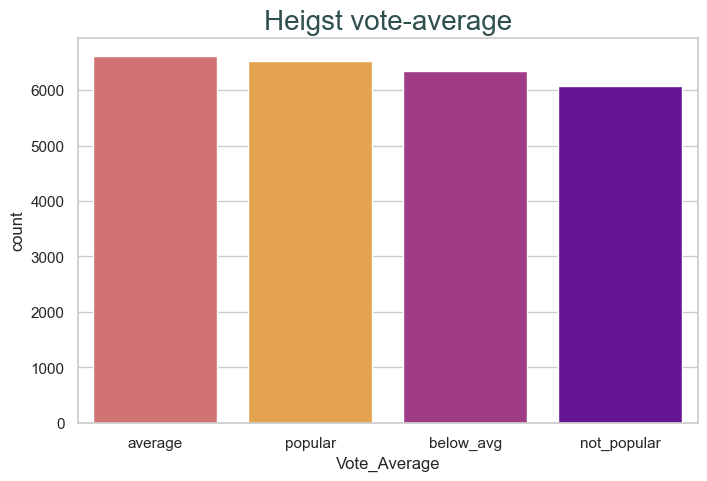

In [84]:
plt.figure(figsize=(8,5))
sns.countplot(x="Vote_Average", data=df, hue="Vote_Average", order=df['Vote_Average'].value_counts().index, palette="plasma")

plt.title("Heigst vote-average", c='darkslategray',size=20)
plt.show()

# CONCLUSION - **average** column has the heigst vote-average 

In [85]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Q3. What movie got the highest popularity? what's its genre?  

In [86]:
top_movie = df.loc[df['Popularity'].idxmax()]

print("Top movie :", top_movie['Title'])
print("Popularity :",top_movie['Popularity'])
print("Genre :",top_movie['Genre'])

Top movie : Spider-Man: No Way Home
Popularity : 5083.954
Genre : Action


               or

In [87]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


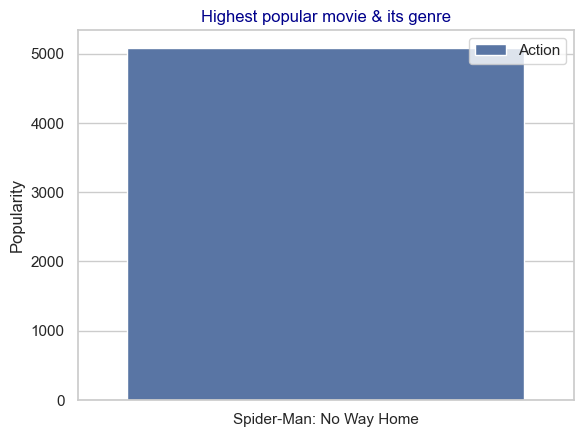

In [88]:
# Es type ke ques ka ans mil chuka h upper to graph jaruri nahi h..
sns.barplot(x= [top_movie['Title']], y= [top_movie['Popularity']], hue= [top_movie['Genre']])

plt.title("Highest popular movie & its genre",c='darkblue')
plt.ylabel("Popularity")
plt.show()

# CONCLUSION -  **Spider-Man: No Way Home** is the highest popular movie & its genre are **Action**, **Adventure** and **Sience Fiction**.


In [89]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Q4. What movie got the lowest popularity? what's its genre?  

In [90]:
lowest_movie = df.loc[df['Popularity'].idxmin()]

print(lowest_movie)
print("\n")

print("Lowest popular movie : ", lowest_movie['Title'])
print("Popularity : ", lowest_movie['Popularity'])
print("Genre : ", lowest_movie['Genre'])

Release_Date                                    2021
Title           The United States vs. Billie Holiday
Popularity                                    13.354
Vote_Count                                       152
Vote_Average                                 average
Genre                                          Music
Name: 25546, dtype: object


Lowest popular movie :  The United States vs. Billie Holiday
Popularity :  13.354
Genre :  Music


            or

In [91]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


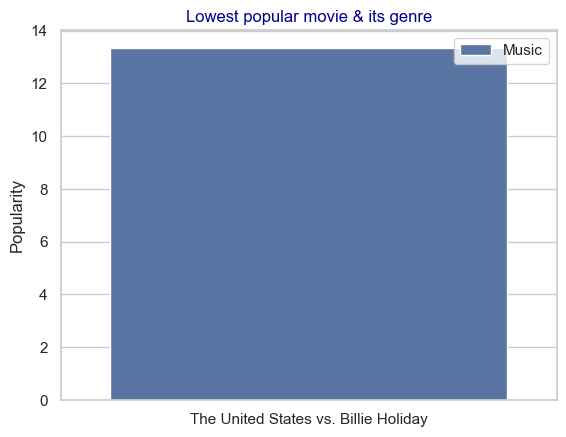

In [92]:
# Es type ke ques ka ans mil chuka h upper to graph jaruri nahi h..
sns.barplot(x= [lowest_movie['Title']], y= [lowest_movie['Popularity']], hue= [lowest_movie['Genre']])

plt.title("Lowest popular movie & its genre",c='darkblue')
plt.ylabel("Popularity")
plt.show()

# CONCLUSION -  **The United States vs. Billie Holiday** is the lowest popular movie & its genre are **music**, **drama**, **war**, **sci-fi** and **history**.

In [93]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Q5. Which year has the most filmmed movies?

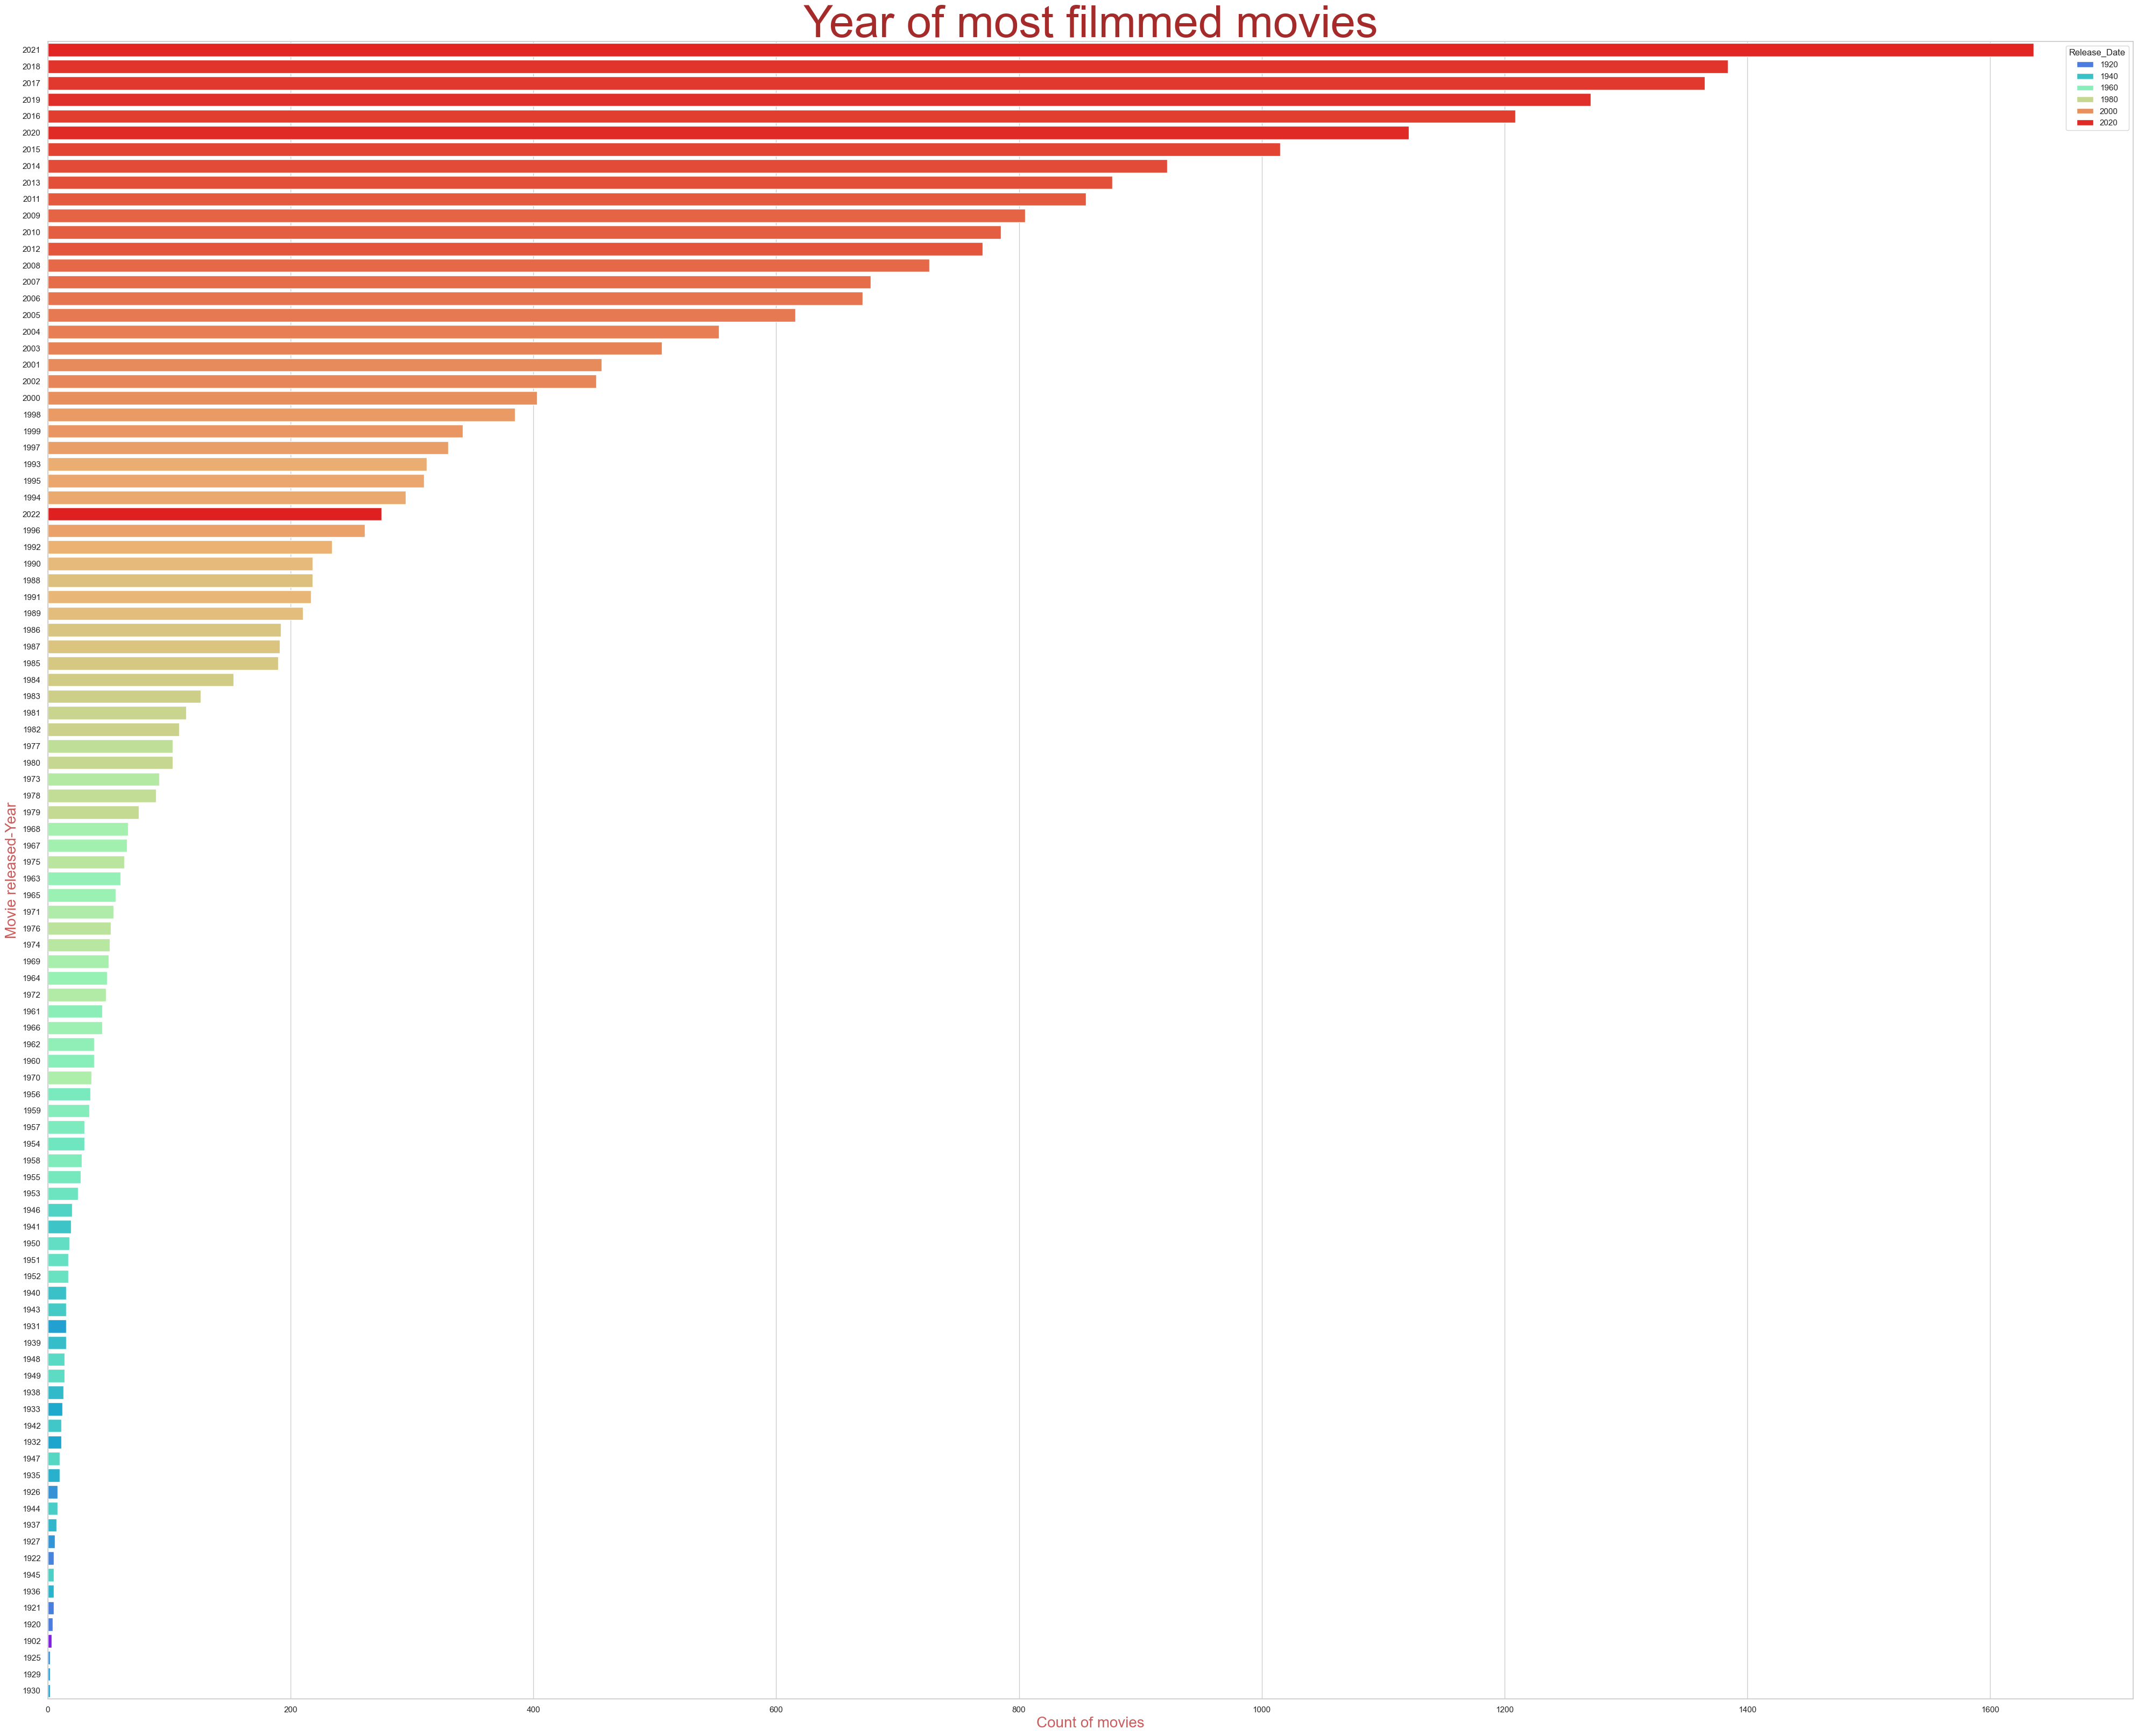

In [94]:
plt.figure(figsize=(50,40))

sns.countplot(y='Release_Date', data=df, hue="Release_Date", palette="rainbow", order=df['Release_Date'].value_counts().index)

plt.title("Year of most filmmed movies", c='brown',size = 60)
plt.ylabel("Movie released-Year", c='indianred',size = 20)
plt.xlabel("Count of movies", c='indianred',size = 20)
plt.show()

# CONCLUSION - In **2021** has the most filmmed movies

># Conclusion Summary

Q1: What is the most frequent genre in the dataset?

* **Drama**  genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other gerires.

Q2: What genres has highest votes?

* we have *25.5%* of our dataset with popular vote (6520 rows). **Drama** again gets the highest popularity among fans by being having more than 18.5% of movies popularity.


Q3: What movie got the highest popularity? what's its genre?

* **Spider-Man: No Way Home** has the highest popularity rate in our dataset and it has genres of **Action**, **Adventure** and **Sience Fiction**.

Q3: What movie got the lowest popularity? what's its genre?

* **The united states, thread** has the highest lowest rate in our dataset and it has genres of **music**, **drama**, **war**, **sci-fi** and **history**.


Q4: Which year has the most filmmed movies?

* In **2021** has the most filmmed movies. 

 *I am Manas, I gain my skill to implement & complete this small project*  

In [95]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Predict Vote_Count for populaarity

In [111]:
from sklearn.model_selection import train_test_split

x = df.drop(['Vote_Count', 'Title', 'Vote_Average', 'Genre'], axis=1)  # Input
y = df['Vote_Count']  # Output

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)  # Hum 80% Data ki Training karte h & 20% Data ki Testing.

x

,Release_Date,Popularity
0,2021,5083.954
1,2021,5083.954
2,2021,5083.954
3,2022,3827.658
4,2022,3827.658
...,...,...
25547,2021,13.354
25548,2021,13.354
25549,1984,13.354
25550,1984,13.354


In [108]:
y

0        8940
1        8940
2        8940
3        1151
4        1151
         ... 
25547     152
25548     152
25549     186
25550     186
25551     186
Name: Vote_Count, Length: 25552, dtype: int64

In [109]:
# Model ko Train karna 80%data ki
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)  # Bhai model ki Training hue h Testing nahi

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [124]:
# Model Train ho gya h Now see thr Prediction, pehle x_test ko predict karenge fir prediction ko y_pred variable me rakh denge fir x_test se compare karenge

y_pred = model.predict(x_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)  # formula me r2 = (Actual data compare by Predictive data)
r2

0.023555816916566052

In [126]:
# For Adjusted R2 = 1-(1-r2)*(n-1)/(n-p-1)

n = x_test.shape[0] # no. of rows
p = x_test.shape[1] # no. of columns

Adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
Adjusted_r2

0.023173497346055782